# Ejercicio 1
 ---


**A) Determinar el período de la secuencia de Von Neumann generada a partir de las semillas:**
- 3009
- 7600
- 1234
- 4321

In [1]:
from generators import Von_Neumann

seeds = [3009, 7600, 1234, 4321]
for seed in seeds:
    period = Von_Neumann.period(seed=seed)
    print(f"El periodo de la semilla [{seed}] es -> {period}")

El periodo de la semilla [3009] es -> 4
El periodo de la semilla [7600] es -> 1
El periodo de la semilla [1234] es -> 57
El periodo de la semilla [4321] es -> 71


**B) Dar el valor de c y de a para que cada generador tenga período máximo.**
- $y_{i+1}=5y_i+c \bmod(2⁵)$ -> Generador lineal congruencial **mixto**
- $x_{i+1}=ax_i \bmod(31)$ -> Generador lineal congruencial **multiplicativo**

**Considerar el generador** $z_{i+1}=x_i+y_i \bmod(2⁵)$ **y calcular su período.** 

In [4]:
# Ejemplo del Generador Lineal Congruencial Mixto
from generators import LinearCongruentialMixed
congruential_mixed = LinearCongruentialMixed.is_maximum_period(a=5, c=3, M=16)
print(f"El Generador Congruencial Lineal Mixto tiene periodo MÁXIMO -> {congruential_mixed}")

El Generador Congruencial Lineal Mixto tiene periodo MÁXIMO -> True


In [1]:
# Ejemplo del Generador Lineal Congruencial Multiplicativo
from generators import LinearCongruentialMultiplicative
primitive_root_candidates = LinearCongruentialMultiplicative.root_primitive_candidates(M=31)
print(f"Los candidatos a raíz primitiva son -> {primitive_root_candidates}")

Descomposición Prima de 30 -> [2, 3, 5]
Los candidatos a raíz primitiva son -> [3, 11, 12, 13, 17, 21, 22, 24]


**Representación gráfica de $(y_i,y_i+1), (x_i,x_i+1)$ y $(z_i,z_i+1)$**

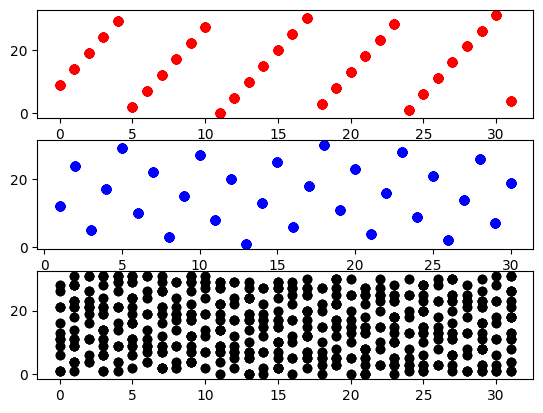

In [1]:
# Generador** $z_{i+1}=x_i+y_i \bmod(2⁵) y calcular su período. 
import matplotlib.pyplot as plt
from generators import InventedCongruentialWithSumm

# Test generador_nuevo
ys, xs, zs = InventedCongruentialWithSumm.invented_congruential_sum(a=12, c=9,M=32 ,iterations=1000, X_seed=1, Y_seed=1)

fig, ax = plt.subplots(3, 1)
ax[0].plot(ys[:-1], ys[1:], 'ro', label='y')
ax[1].plot(xs[:-1], xs[1:], 'bo', label='x')
ax[2].plot(zs[:-1], zs[1:], 'ko', label='z')
plt.show()

**C) Indicar en cuáles de los siguientes casos el generador:**
- $y_{i+1}=ay_i+c \bmod(M)$

**genera una secuencia de período máximo.**

In [8]:
from generators import LinearCongruentialMixed
#(a,c,M)
inputs = [(125,3,2**9), (123,3,2**9), (125,3,2**9), (5,0,71), (7,0,71)]

for inps in inputs:
    print(f"a = {inps[0]}, c = {inps[1]}, M = {inps[2]} genera una secuencia de período máximo -> {LinearCongruentialMixed.is_maximum_period(inps[0],inps[1], inps[2])}")

a = 125, c = 3, M = 512 genera una secuencia de período máximo -> True
a = 123, c = 3, M = 512 genera una secuencia de período máximo -> False
a = 125, c = 3, M = 512 genera una secuencia de período máximo -> True
a = 5, c = 0, M = 71 genera una secuencia de período máximo -> False
a = 7, c = 0, M = 71 genera una secuencia de período máximo -> False


**d) Utilice el generador RANDU**
- $u_i=a*u_i-1$

con los valores:
- $a=2^{16}+3$
- $M=2^{31}$

**Para generar puntos aleatorios en el cubo** $[0,M), [0,M), [0,M)$ de la forma
- $(u_1,u_2,u_3), (u_4,u_5,u_6)...$

**Y estimar el porcentaje de los puntos que caen en la esfera centrada en (M/2,M/2,M/2) de radio M/10**

**Repetir el procedimiento con:**
- $a=7^{5}$
- $M=2^{31}-1$

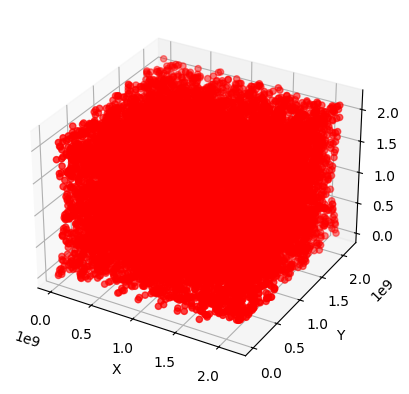

In [ ]:
from generators import Randu
import matplotlib.pyplot as plt

# Seed
a = (2 ** 16) + 3
M = 2 ** 31
seed = 1
iterations = 50000
randu_generation = Randu.randu_generator(
    a=a, seed=seed, M=M, iterations=iterations)

# Seteo las tuplas
xs = randu_generation[0::3]
ys = randu_generation[1::3]
zs = randu_generation[2::3]


# Plot 3D de los puntos generados con ternas (u_i, u_i+1, u_i+2)
# Rotarlo para encontrar los hiperplanos
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs, c='r', marker='o')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()



<div style="display:flex;
            justify-content: center;
            align-items:center;">
<img src="imgs/Figure_1.png" alt="imgs/image.png" style="width: 500px;"/>
</div>

In [ ]:
import math
# Estimacion de puntos que entran en una esfera de radio M/10
# en el cubo de lado 
# Esto deberia darnos cercano a el cociente volumen de la esfera / volumen del cubo
def estimation_of_points_on_sphere(xs:list[int], ys:list[int], zs:list[int], M:int) -> int:
    counter = 0
    for i in range(0, int(50001 / 3)):
        if (xs[i] - M / 2)**2 + (ys[i] - M / 2)**2 + (zs[i] - M / 2)**2 <= (M / 10)**2:
            counter += 1

    points_estimation = counter / (50001 / 3)
    print(f"Estimacion de puntos en la esfera: {points_estimation}")
    print(4 * math.pi / 3000)
    return points_estimation



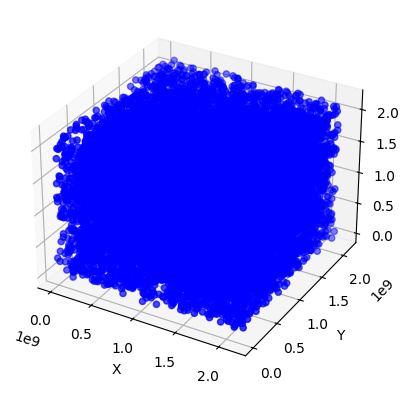

In [21]:
# Ahora probamos con la otra entrada

# Seed
a = 7 ** 5
M_1 = (2 ** 31) - 1
seed = 1
iterations = 50000
randu_generation = Randu.randu_generator(
    a=a, seed=seed, M=M, iterations=iterations)

# Seteo las tuplas
xs1 = randu_generation[0::3]
ys1 = randu_generation[1::3]
zs1 = randu_generation[2::3]


# Plot 3D de los puntos generados con ternas (u_i, u_i+1, u_i+2)
# Rotarlo para encontrar los hiperplanos
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs1, ys1, zs1, c='b', marker='o')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [24]:
estimation_1 = estimation_of_points_on_sphere(xs=xs, ys=ys, zs=zs, M=M)
estimation_2 = estimation_of_points_on_sphere(xs=xs1, ys=ys1, zs=zs1, M=M_1)
max_estimation = estimation_1 if estimation_1 > estimation_2 else estimation_2
print(f"El valor de la mayor estimacion de puntos en la esfera es: {max_estimation}")


Estimacion de puntos en la esfera: 0.004019919601607968
0.0041887902047863905
Estimacion de puntos en la esfera: 0.003239935201295974
0.0041887902047863905


TypeError: '>' not supported between instances of 'NoneType' and 'NoneType'